In [22]:
import pymongo
import pprint as pp
import json
# Replace XXXX with your connection URI from the Atlas UI

# mongodb:// is the protocol definition
# localhost:27017 is the server we are connecting to
# /myproject is the database we wish to connect to

url = 'mongodb://localhost:27017/m201'
client = pymongo.MongoClient(url)
taxi = client['m201']['shenzhen_taxi']

query = {
    "geometry": {
        "$geoWithin": { 
            "$centerSphere": [ 
                [ 114.04775137614286, 22.534939427320566 ], 
                0.0003508783432920873 
            ]
        }
    }
}
projection = {"_id":0}

points = {}
points['type'] = 'FeatureCollection'
points['features'] = []

for t in taxi.find(query,projection):
#     print(t)
    points['features'].append(t)

pp.pprint(len(points['features']))

# save as geojson format
with open('./GeojsonGraphData/filter_shenzhen_taxi.json', 'w') as outfile:  
    json.dump(points,outfile, indent=4)

80663


In [23]:
import s2sphere as s2
cellids = []
for point in points['features']:
    p = s2.LatLng.from_degrees(point['geometry']['coordinates'][1],point['geometry']['coordinates'][0])
    cellid = s2.CellId.from_lat_lng(p).pos()
    cellids.append(cellid)

In [24]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)


[1442261585176609819, 1442261585208418481, 1442261585208418481, 1442261585208418481, 1442261585222704901, 1442261585225143525, 1442261585242053475, 1442261585254350837, 1442261585267655679, 1442261585296084857, 1442261585309607087, 1442261585319575383, 1442261585324466421, 1442261585340505639, 1442261585424493643, 1442261585446831825, 1442261585448047605, 1442261585450712113, 1442261585453159397, 1442261585482303201, 1442261585482659639, 1442261585483937121, 1442261585483937121, 1442261585490528515, 1442261585501498249, 1442261585502946297, 1442261585511123297, 1442261585513308313, 1442261585561693317, 1442261585576999189, 1442261585581166307, 1442261585587047175, 1442261585597704491, 1442261585622707703, 1442261585649712323, 1442261585649712323, 1442261585649712323, 1442261585649712323, 1442261585649712323, 1442261585649712323, 1442261585649712323, 1442261585649712323, 1442261585649712323, 1442261585652167869, 1442261585654756061, 1442261585655919013, 1442261585656633661, 144226158567

0.25    1.442262e+18
0.50    1.442265e+18
0.75    1.442265e+18
Name: 0, dtype: float64
1442267554269784887
0.25    1.442262e+18
0.50    1.442265e+18
0.75    1.442265e+18
Name: p1cellid, dtype: float64


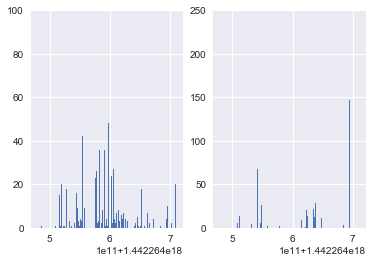

In [91]:
dis_range = [1.44226448e+18, 1.44226471e+18]
bins = 10000
df = pd.DataFrame(cellids)
print(df[0].quantile([0.25,0.5,0.75]))
print(max(cellids))
plt.figure(0)
plt.subplot(121)
plt.hist(cellids, bins=bins, range=dis_range)
plt.ylim(0,100)

data = pd.read_csv('./road_id.csv')
data.columns = ['p1lng','p1lat','p1cellid','p2lng','p2lat','p2cellid']
print(data.p1cellid.quantile([0.25,0.5,0.75]))
plt.subplot(122)
plt.hist(data.p1cellid, bins=bins, range=dis_range)
plt.ylim(0,250)
plt.show()

0.25    1.442262e+18
0.50    1.442265e+18
0.75    1.442265e+18
Name: 0, dtype: float64
1442267554269784887
0.25    1.442262e+18
0.50    1.442265e+18
0.75    1.442265e+18
Name: p1cellid, dtype: float64


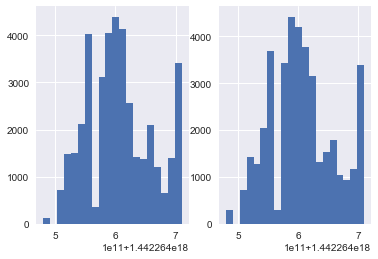

In [93]:
bins = 20
dis_range = [1.44226448e+18, 1.44226471e+18]
df = pd.DataFrame(cellids)
print(df[0].quantile([0.25,0.5,0.75]))
print(max(cellids))
plt.figure(1)
plt.subplot(121)
plt.hist(cellids, bins=bins, range=dis_range)

data = pd.read_csv('./road_id.csv')
data.columns = ['p1lng','p1lat','p1cellid','p2lng','p2lat','p2cellid']
print(data.p1cellid.quantile([0.25,0.5,0.75]))
plt.subplot(122)
plt.hist(data.p1cellid, bins=bins, range=dis_range)
plt.show()


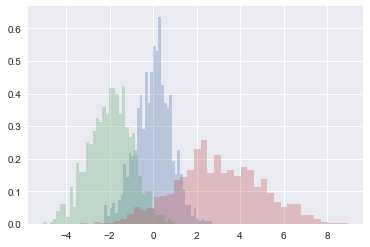

In [88]:

x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);